# Pre-processing and Training Data Development

In [335]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load data

In [336]:
data = pd.read_csv('../data/interim/energy_weather_explore.csv',index_col=0)

In [337]:
data.head()

,datetime,energy,humidity,pressure,temperature,weather,wind_direction,wind_speed,year,month,month_name,day,hour,day_name,weekday
0,2012-12-31 01:00:00,10445.0,68.0,1020.0,269.72,overcast clouds,290.0,6.0,2012,12,December,31,1,Monday,0
1,2012-12-31 02:00:00,9897.0,73.0,1020.0,269.05,overcast clouds,290.0,6.0,2012,12,December,31,2,Monday,0
2,2012-12-31 03:00:00,9538.0,68.0,1021.0,268.53,overcast clouds,280.0,6.0,2012,12,December,31,3,Monday,0
3,2012-12-31 04:00:00,9333.0,79.0,1022.0,267.83,overcast clouds,280.0,8.0,2012,12,December,31,4,Monday,0
4,2012-12-31 05:00:00,9275.0,85.0,1023.0,266.77,overcast clouds,270.0,6.0,2012,12,December,31,5,Monday,0


## Convert some features to one-hot encoding

First, the categorical data for year, month, day, hour, and weather type must be converted to one hot encoding. Here, the first item is not dropped to retain explanability.

In [338]:
one_hot_year = pd.get_dummies(data.year,prefix='year')
data = data.join(one_hot_year)

In [339]:
one_hot_month = pd.get_dummies(data.month,prefix='month')
data = data.join(one_hot_month)

In [340]:
one_hot_day = pd.get_dummies(data.day,prefix='day')
data = data.join(one_hot_day)

In [341]:
one_hot_hour = pd.get_dummies(data.hour,prefix='hour')
data = data.join(one_hot_hour)

For weather, there are several types that occur less frequently. Thus, any weather type less than 100 occurances out of 44081 days will be considered as "others".

In [342]:
data.weather.value_counts()

sky is clear                           10550
broken clouds                           7073
overcast clouds                         5095
scattered clouds                        4379
mist                                    4071
few clouds                              3760
light rain                              3688
moderate rain                           1452
light snow                               886
haze                                     871
fog                                      527
heavy intensity rain                     501
snow                                     241
light intensity drizzle                  227
heavy snow                               185
proximity thunderstorm                   178
drizzle                                  143
thunderstorm                              78
thunderstorm with light rain              60
very heavy rain                           29
thunderstorm with rain                    27
thunderstorm with heavy rain              20
proximity 

In [343]:
counts = data.weather.value_counts()
mask = data['weather'].isin(counts[counts < 100].index)
data['weather'][mask] = 'other'

/Users/gritkupgan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [344]:
one_hot_weather = pd.get_dummies(data.weather,prefix='weather')
data = data.join(one_hot_weather)

In [345]:
data.head()

,datetime,energy,humidity,pressure,temperature,weather,wind_direction,wind_speed,year,month,...,weather_light rain,weather_light snow,weather_mist,weather_moderate rain,weather_other,weather_overcast clouds,weather_proximity thunderstorm,weather_scattered clouds,weather_sky is clear,weather_snow
0,2012-12-31 01:00:00,10445.0,68.0,1020.0,269.72,overcast clouds,290.0,6.0,2012,12,...,0,0,0,0,0,1,0,0,0,0
1,2012-12-31 02:00:00,9897.0,73.0,1020.0,269.05,overcast clouds,290.0,6.0,2012,12,...,0,0,0,0,0,1,0,0,0,0
2,2012-12-31 03:00:00,9538.0,68.0,1021.0,268.53,overcast clouds,280.0,6.0,2012,12,...,0,0,0,0,0,1,0,0,0,0
3,2012-12-31 04:00:00,9333.0,79.0,1022.0,267.83,overcast clouds,280.0,8.0,2012,12,...,0,0,0,0,0,1,0,0,0,0
4,2012-12-31 05:00:00,9275.0,85.0,1023.0,266.77,overcast clouds,270.0,6.0,2012,12,...,0,0,0,0,0,1,0,0,0,0


# Split data

In [346]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size=0.25, random_state=42)
data_train = data_train.copy()
data_test = data_test.copy()

# Standardization

## Energy data

In [347]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

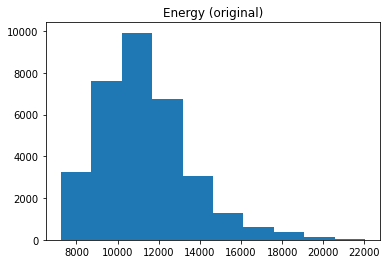

In [348]:
plt.hist(data_train['energy'])
plt.title('Energy (original)')
plt.show()

The distribution of energy is skewed normal, standard scaler will be used.

In [349]:
scaler = StandardScaler()
scaler.fit(data_train[['energy']])
data_trasformed = scaler.transform(data_train[['energy']])
data_train['n_energy'] = data_trasformed

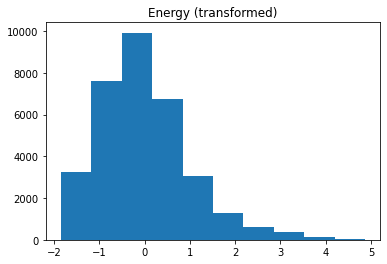

In [350]:
plt.hist(data_trasformed)
plt.title('Energy (transformed)')
plt.show()

## Humidity data

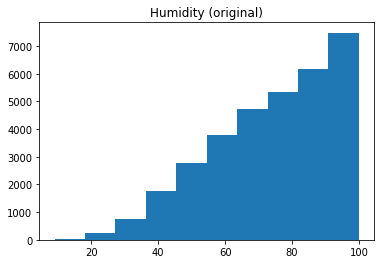

In [351]:
plt.hist(data_train['humidity'])
plt.title('Humidity (original)')
plt.show()

The humidity measurement is typically between 0 to 100%. Thus, there is no outlier here and maxmin scaler will be used.

In [352]:
scaler = MinMaxScaler()
scaler.fit(data_train[['humidity']])
data_trasformed = scaler.transform(data_train[['humidity']])
data_train['n_humidity'] = data_trasformed

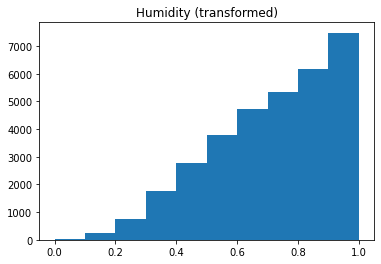

In [353]:
plt.hist(data_trasformed)
plt.title('Humidity (transformed)')
plt.show()

## Pressure data

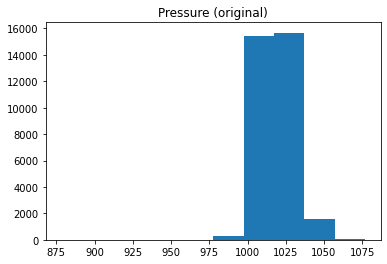

In [354]:
plt.hist(data_train['pressure'])
plt.title('Pressure (original)')
plt.show()

The pressure data is roughly normal, standard scaler will be applied. Also, the pressure data appear to contain outliers. The outliers will be removed using 3 standard deviations as the limits.

In [355]:
mean = data_train.pressure.mean()
std = data_train.pressure.std()
cutoff = std*3
upper, lower = mean + cutoff, mean - cutoff
data_train = data_train[(data_train['pressure'] < upper) & (data_train['pressure'] > lower)]

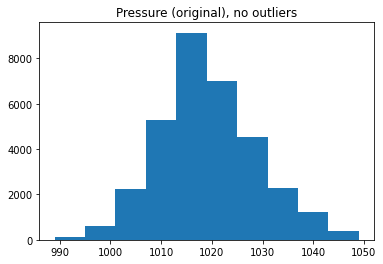

In [356]:
plt.hist(data_train['pressure'])
plt.title('Pressure (original), no outliers')
plt.show()

In [357]:
scaler = MinMaxScaler()
scaler.fit(data_train[['pressure']])
data_trasformed = scaler.transform(data_train[['pressure']])
data_train['n_pressure'] = data_trasformed

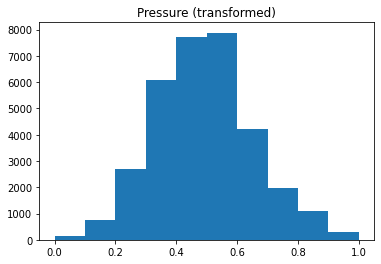

In [358]:
plt.hist(data_trasformed)
plt.title('Pressure (transformed)')
plt.show()

## Temperature data

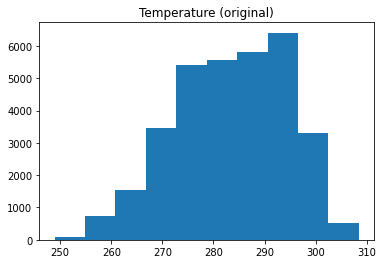

In [359]:
plt.hist(data_train['temperature'])
plt.title('Temperature (original)')
plt.show()

The distribution of temperature is roughly normal, standard scaler will be used.

In [360]:
scaler = StandardScaler()
scaler.fit(data_train[['temperature']])
data_trasformed = scaler.transform(data_train[['temperature']])
data_train['n_temperature'] = data_trasformed

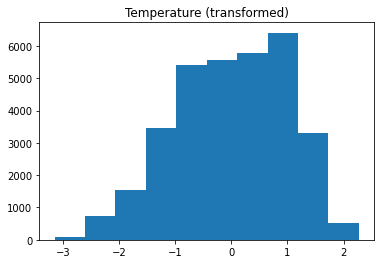

In [361]:
plt.hist(data_trasformed)
plt.title('Temperature (transformed)')
plt.show()

## Wind direction data

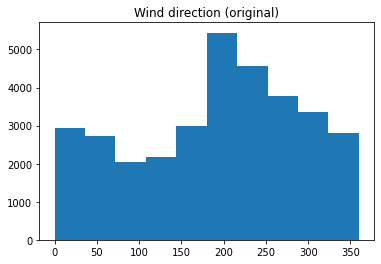

In [362]:
plt.hist(data_train['wind_direction'])
plt.title('Wind direction (original)')
plt.show()

The distribution is not normal, minmax scaling will be used.

In [363]:
scaler = MinMaxScaler()
scaler.fit(data_train[['wind_direction']])
data_trasformed = scaler.transform(data_train[['wind_direction']])
data_train['n_wind_direction'] = data_trasformed

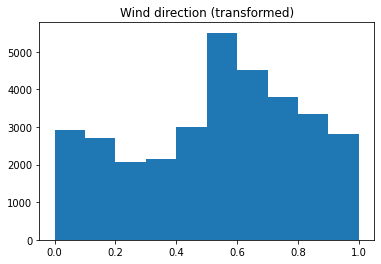

In [364]:
plt.hist(data_trasformed)
plt.title('Wind direction (transformed)')
plt.show()

## Wind speed data

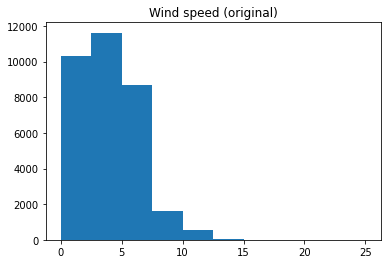

In [365]:
plt.hist(data_train['wind_speed'])
plt.title('Wind speed (original)')
plt.show()

The wind speed is highly skewed to the left. Here the power transform featurewise is appropriate.

In [366]:
scaler = PowerTransformer()
scaler.fit(data_train[['wind_speed']])
data_trasformed = scaler.transform(data_train[['wind_speed']])
data_train['n_wind_speed'] = data_trasformed

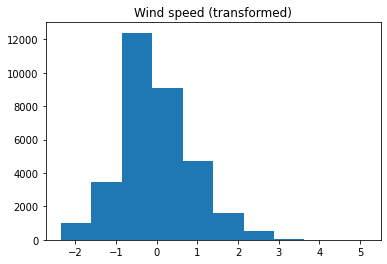

In [367]:
plt.hist(data_trasformed)
plt.title('Wind speed (transformed)')
plt.show()

In [368]:
data_train.head()

,datetime,energy,humidity,pressure,temperature,weather,wind_direction,wind_speed,year,month,...,weather_proximity thunderstorm,weather_scattered clouds,weather_sky is clear,weather_snow,n_energy,n_humidity,n_pressure,n_temperature,n_wind_direction,n_wind_speed
1029,2012-11-10 10:00:00,9660.0,80.0,1019.0,276.020000,mist,170.0,3.0,2012,11,...,0,0,0,0,-0.750913,0.780220,0.500000,-0.680922,0.472222,-0.227407
40273,2017-06-08 08:00:00,9545.0,93.0,1018.0,285.360000,sky is clear,204.0,0.0,2017,6,...,0,0,1,0,-0.803172,0.923077,0.483333,0.169368,0.566667,-2.351618
12574,2014-09-14 10:00:00,8267.0,100.0,1040.0,283.035333,few clouds,214.0,3.0,2014,9,...,0,0,0,0,-1.383929,1.000000,0.850000,-0.042264,0.594444,-0.227407
24564,2015-04-25 15:00:00,10003.0,78.0,1023.0,279.729000,light rain,96.0,5.0,2015,4,...,0,0,0,0,-0.595044,0.758242,0.566667,-0.343264,0.266667,0.634893
30893,2016-08-04 09:00:00,13875.0,91.0,1013.0,293.520000,sky is clear,145.0,1.0,2016,8,...,0,0,1,0,1.164496,0.901099,0.400000,0.912234,0.402778,-1.427690


In [369]:
data_test.head()

,datetime,energy,humidity,pressure,temperature,weather,wind_direction,wind_speed,year,month,...,weather_light rain,weather_light snow,weather_mist,weather_moderate rain,weather_other,weather_overcast clouds,weather_proximity thunderstorm,weather_scattered clouds,weather_sky is clear,weather_snow
14500,2014-06-26 16:00:00,14150.0,98.0,1031.0,286.506000,light rain,21.0,1.0,2014,6,...,1,0,0,0,0,0,0,0,0,0
10439,2014-12-12 11:00:00,13012.0,100.0,1040.0,271.060000,sky is clear,292.0,4.0,2014,12,...,0,0,0,0,0,0,0,0,1,0
20743,2015-10-01 10:00:00,10587.0,58.0,1024.0,283.150000,broken clouds,60.0,6.0,2015,10,...,0,0,0,0,0,0,0,0,0,0
8568,2013-03-04 19:00:00,12984.0,34.0,1019.0,273.790000,few clouds,330.0,4.0,2013,3,...,0,0,0,0,0,0,0,0,0,0
23998,2015-05-18 01:00:00,10405.0,69.0,1025.0,290.402667,moderate rain,201.0,6.0,2015,5,...,0,0,0,1,0,0,0,0,0,0


In [370]:
data_train.to_csv('../data/interim/energy_weather_features_train.csv')
data_test.to_csv('../data/interim/energy_weather_features_test.csv')